<a href="https://colab.research.google.com/github/user074/EmotionTransformer/blob/main/Latent_Transformer.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# # First, authenticate your Google Drive account
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import sys
import torch

# Clone the Repo and load the model checkpoiont

In [ ]:
!git clone https://github.com/CompVis/taming-transformers
%cd taming-transformers

Cloning into 'taming-transformers'...
remote: Enumerating objects: 1339, done.
remote: Total 1339 (delta 0), reused 0 (delta 0), pack-reused 1339
Receiving objects: 100% (1339/1339), 409.77 MiB | 71.67 MiB/s, done.
Resolving deltas: 100% (281/281), done.
/content/taming-transformers


In [ ]:
!mkdir logs

In [ ]:
# !cp '/content/drive/MyDrive/Colab Notebooks/LatentTransformer/2020-11-13T21-41-45_faceshq_transformer.zip' /content/taming-transformers/logs
# !unzip /content/taming-transformers/logs/2020-11-13T21-41-45_faceshq_transformer.zip -d /content/taming-transformers/logs/

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/LatentTransformer/2020-11-09T13-33-36_faceshq_vqgan.zip' /content/taming-transformers/logs
!unzip /content/taming-transformers/logs/2020-11-09T13-33-36_faceshq_vqgan.zip -d /content/taming-transformers/logs/

Archive:  /content/taming-transformers/logs/2020-11-09T13-33-36_faceshq_vqgan.zip
   creating: /content/taming-transformers/logs/2020-11-09T13-33-36_faceshq_vqgan/
   creating: /content/taming-transformers/logs/2020-11-09T13-33-36_faceshq_vqgan/checkpoints/
 extracting: /content/taming-transformers/logs/2020-11-09T13-33-36_faceshq_vqgan/checkpoints/last.ckpt  
   creating: /content/taming-transformers/logs/2020-11-09T13-33-36_faceshq_vqgan/configs/
 extracting: /content/taming-transformers/logs/2020-11-09T13-33-36_faceshq_vqgan/configs/2020-11-09T13-33-36-lightning.yaml  
 extracting: /content/taming-transformers/logs/2020-11-09T13-33-36_faceshq_vqgan/configs/2020-11-09T13-33-36-project.yaml  


In [ ]:
# !mkdir -p logs/2020-11-09T13-31-51_sflckr/checkpoints
# !wget 'https://heibox.uni-heidelberg.de/d/73487ab6e5314cb5adba/files/?p=%2Fcheckpoints%2Flast.ckpt&dl=1' -O 'logs/2020-11-09T13-31-51_sflckr/checkpoints/last.ckpt'
# !mkdir logs/2020-11-09T13-31-51_sflckr/configs
# !wget 'https://heibox.uni-heidelberg.de/d/73487ab6e5314cb5adba/files/?p=%2Fconfigs%2F2020-11-09T13-31-51-project.yaml&dl=1' -O 'logs/2020-11-09T13-31-51_sflckr/configs/2020-11-09T13-31-51-project.yaml'

In [ ]:
%%capture
%pip install omegaconf>=2.0.0 pytorch-lightning>=1.0.8 einops>=0.3.0
sys.path.append(".")

# also disable grad to save memory
torch.set_grad_enabled(False)

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
!mkdir output

In [ ]:
# !python scripts/make_samples.py --outdir output -r logs/2020-11-13T21-41-45_faceshq_transformer/


In [ ]:
# # download a VQGAN with f=16 (16x compression per spatial dimension) and with a codebook with 1024 entries
!mkdir -p logs/vqgan_imagenet_f16_1024/checkpoints
!mkdir -p logs/vqgan_imagenet_f16_1024/configs
!wget 'https://heibox.uni-heidelberg.de/f/140747ba53464f49b476/?dl=1' -O 'logs/vqgan_imagenet_f16_1024/checkpoints/last.ckpt' 
!wget 'https://heibox.uni-heidelberg.de/f/6ecf2af6c658432c8298/?dl=1' -O 'logs/vqgan_imagenet_f16_1024/configs/model.yaml' 

# # download a VQGAN with f=16 (16x compression per spatial dimension) and with a larger codebook (16384 entries)
# !mkdir -p logs/vqgan_imagenet_f16_16384/checkpoints
# !mkdir -p logs/vqgan_imagenet_f16_16384/configs
# !wget 'https://heibox.uni-heidelberg.de/f/867b05fc8c4841768640/?dl=1' -O 'logs/vqgan_imagenet_f16_16384/checkpoints/last.ckpt' 
# !wget 'https://heibox.uni-heidelberg.de/f/274fb24ed38341bfa753/?dl=1' -O 'logs/vqgan_imagenet_f16_16384/configs/model.yaml' 

# download a VQGAN with f=8 (8x compression per spatial dimension) and a larger codebook-size with 8192 entries
# !mkdir -p logs/vqgan_gumbel_f8/checkpoints
# !mkdir -p logs/vqgan_gumbel_f8/configs
# !wget 'https://heibox.uni-heidelberg.de/f/34a747d5765840b5a99d/?dl=1' -O 'logs/vqgan_gumbel_f8/checkpoints/last.ckpt' 
# !wget 'https://heibox.uni-heidelberg.de/f/b24d14998a8d4f19a34f/?dl=1' -O 'logs/vqgan_gumbel_f8/configs/model.yaml' 

--2023-03-03 17:03:27--  https://heibox.uni-heidelberg.de/f/140747ba53464f49b476/?dl=1
Resolving heibox.uni-heidelberg.de (heibox.uni-heidelberg.de)... 129.206.7.113
Connecting to heibox.uni-heidelberg.de (heibox.uni-heidelberg.de)|129.206.7.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://heibox.uni-heidelberg.de/seafhttp/files/c3c82e95-0b97-4706-a1df-7a9e3ea2635e/last.ckpt [following]
--2023-03-03 17:03:27--  https://heibox.uni-heidelberg.de/seafhttp/files/c3c82e95-0b97-4706-a1df-7a9e3ea2635e/last.ckpt
Reusing existing connection to heibox.uni-heidelberg.de:443.
HTTP request sent, awaiting response... 200 OK
Length: 957954257 (914M) [application/octet-stream]
Saving to: ‘logs/vqgan_imagenet_f16_1024/checkpoints/last.ckpt’

logs/vqgan_imagenet 100%[===================>] 913.58M  10.1MB/s    in 93s     

2023-03-03 17:05:01 (9.78 MB/s) - ‘logs/vqgan_imagenet_f16_1024/checkpoints/last.ckpt’ saved [957954257/957954257]

--2023-03-03 17:05:01--  h

# Utility Functions from VQGAN

In [ ]:
import yaml
import torch
from omegaconf import OmegaConf
from taming.models.vqgan import VQModel, GumbelVQ

def load_config(config_path, display=False):
  config = OmegaConf.load(config_path)
  if display:
    print(yaml.dump(OmegaConf.to_container(config)))
  return config

def load_vqgan(config, ckpt_path=None, is_gumbel=False):
  if is_gumbel:
    model = GumbelVQ(**config.model.params)
  else:
    model = VQModel(**config.model.params)
  if ckpt_path is not None:
    sd = torch.load(ckpt_path, map_location="cpu")["state_dict"]
    missing, unexpected = model.load_state_dict(sd, strict=False)
  return model.eval()

def preprocess_vqgan(x):
  x = 2.*x - 1.
  return x

def custom_to_pil(x):
  x = x.detach().cpu()
  x = torch.clamp(x, -1., 1.)
  x = (x + 1.)/2.
  x = x.permute(1,2,0).numpy()
  x = (255*x).astype(np.uint8)
  x = Image.fromarray(x)
  if not x.mode == "RGB":
    x = x.convert("RGB")
  return x

def reconstruct_with_vqgan(x, model):
  # could also use model(x) for reconstruction but use explicit encoding and decoding here
  z, _, [_, _, indices] = model.encode(x)
  print(f"VQGAN --- {model.__class__.__name__}: latent shape: {z.shape[2:]}")
  xrec = model.decode(z)
  return xrec

# Load VQGAN

In [ ]:
config1024 = load_config("logs/vqgan_imagenet_f16_1024/configs/model.yaml", display=False)
# config16384 = load_config("logs/vqgan_imagenet_f16_16384/configs/model.yaml", display=False)

model1024 = load_vqgan(config1024, ckpt_path="logs/vqgan_imagenet_f16_1024/checkpoints/last.ckpt").to(DEVICE)
# model16384 = load_vqgan(config16384, ckpt_path="logs/vqgan_imagenet_f16_16384/checkpoints/last.ckpt").to(DEVICE)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.


Reduce Image size with this

In [ ]:
# config32x32 = load_config("logs/vqgan_gumbel_f8/configs/model.yaml", display=False)
# model32x32 = load_vqgan(config32x32, ckpt_path="logs/vqgan_gumbel_f8/checkpoints/last.ckpt", is_gumbel=True).to(DEVICE)

Working with z of shape (1, 256, 32, 32) = 262144 dimensions.


# Code showing image from the code book

In [ ]:
configFace = load_config("logs/2020-11-09T13-33-36_faceshq_vqgan/configs/2020-11-09T13-33-36-project.yaml", display=True)
modelFace = load_vqgan(configFace, ckpt_path="logs/2020-11-09T13-33-36_faceshq_vqgan/checkpoints/last.ckpt").to(DEVICE)

data:
  params:
    batch_size: 3
    num_workers: 8
    train:
      params:
        crop_size: 256
        size: 256
      target: taming.data.faceshq.FacesHQTrain
    validation:
      params:
        crop_size: 256
        size: 256
      target: taming.data.faceshq.FacesHQValidation
  target: main.DataModuleFromConfig
model:
  base_learning_rate: 4.5e-06
  params:
    ddconfig:
      attn_resolutions:
      - 16
      ch: 128
      ch_mult:
      - 1
      - 1
      - 2
      - 2
      - 4
      double_z: false
      dropout: 0.0
      in_channels: 3
      num_res_blocks: 2
      out_ch: 3
      resolution: 256
      z_channels: 256
    embed_dim: 256
    lossconfig:
      params:
        codebook_weight: 1.0
        disc_conditional: false
        disc_in_channels: 3
        disc_start: 30001
        disc_weight: 0.8
      target: taming.modules.losses.vqperceptual.VQLPIPSWithDiscriminator
    n_embed: 1024
  target: taming.models.vqgan.VQModel

Working with z of shape (1, 256, 1

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

8.19kB [00:00, 494kB/s]                    


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.


In [ ]:
# vqgan_model = VQModel()
# vqgan_model.load_state_dict(torch.load("logs/vqgan_gumbel_f8/checkpoints/last.ckpt"))
# vqgan_model.to(DEVICE)

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/LatentTransformer/00019.jpg' /content

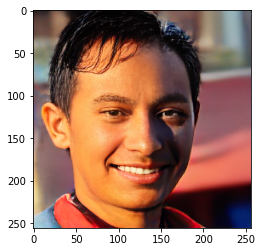

In [ ]:
im = Image.open('/content/00019.jpg').convert('RGB').resize((256, 256))
im_tensor = torch.tensor(np.array(im)).permute(2, 0, 1) / 255
z, a, b = modelFace.encode(im_tensor.to(DEVICE).unsqueeze(0) * 2 - 1) 
idx = b[-1] # The codebook entries (16x16 tokens so shape is [256])
z_q = modelFace.quantize.embedding(idx).reshape(1, 16, 16, 256).permute(0,3,1,2) #quantize:quant, emb_loss, info 
plt.imshow(modelFace.decode(z_q).add(1).div(2).cpu().squeeze().permute(1, 2, 0))

In [ ]:
b

(None,
 None,
 tensor([ 513,  230,  805,  988,  785,  370,  988,  370,   88,  831,   63,   90,
          977,  805,  548,   14,   90,  138,   88,  875,  453,   88,   88,  453,
          869, 1003,  801,  469,  230,  805,  573,  651,  911,  172,   39,  453,
          169,  172,  584,  805,  651,  431,  108,  431,  566,   63,  105,  815,
          977,  431,   88,  651,  873,  527,  875,  301,   57,  311,  806,  117,
           37,  805,   37,  849,  573,  801,   54,  747,  551, 1003,  371,  597,
          739,  634,  680,  453,  273,  230,  604,  604,  502,   39,  334,  172,
          168,  873,  371,  812,  206,  312,  995,   88,  806,  527,   90,   90,
          584,  431,  295,  206,  818,   53,  608,  818,  818,  453,  589,  875,
          584,  359,  609,  609,  551,  371,  901,  168,  379,  501,  455,  831,
          455,  747,  608,  625,   14, 1023, 1023,  517,   54,  818,  379,  700,
          371,  597,  812,  168,  501,  891,   63,  651,  680,  609,  469,  609,
          169,

In [ ]:
idx.shape

torch.Size([256])

In [ ]:
z_q.shape

torch.Size([1, 256, 16, 16])

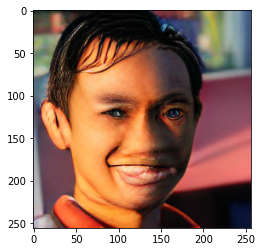

In [ ]:
im = Image.open('/content/00019.jpg').convert('RGB').resize((256, 256))
im_tensor = torch.tensor(np.array(im)).permute(2, 0, 1) / 255
z, a, b = model1024.encode(im_tensor.to(DEVICE).unsqueeze(0) * 2 - 1) 
idx = b[-1] # The codebook entries (16x16 tokens so shape is [256])
z_q = model1024.quantize.embedding(idx).reshape(1, 16, 16, 256).permute(0,3,1,2) #quantize:quant, emb_loss, info 
plt.imshow(model1024.decode(z_q).add(1).div(2).cpu().squeeze().permute(1, 2, 0))

# Copy and clean the data

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/LatentTransformer/fertest.jpg' /content
!cp '/content/drive/MyDrive/CUNY-Phd/data/fer2013/fer2013.csv' /content/

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers datasets

In [ ]:
from datasets import *
from transformers import ViTFeatureExtractor
from transformers import ViTModel
from transformers import TrainingArguments, Trainer
from transformers.modeling_outputs import SequenceClassifierOutput
import numpy as np
import pandas as pd 
import torch.nn as nn
import pickle
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
string_labels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral']

In [ ]:
# feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

In [ ]:
fer_df = pd.read_csv("/content/fer2013.csv")  # available on kaggle

In [ ]:
fer_df.head()

In [ ]:
def prepare_fer_data(data):
    """ Prepare fer data for vision transformer 
        input: fer df loaded from csv
        output: df that can be load into a huggingface dataset """

    # outputs
    image_list = []
    image_labels = list(map(int, data['emotion']))
    
    # go over all images
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        # adapt grayscale to rgb format (change single values to triplets of the same value)
        image = image[..., np.newaxis]
        image = np.repeat(image, 3, axis=2)
        # convert to list format used by the later functions
        image = image.astype(int).tolist()
        # save to output
        image_list.append(image)

    output_df = pd.DataFrame(list(zip(image_list, image_labels)),
               columns =['img', 'label'])
        
    return output_df

In [ ]:
fer_train_df = prepare_fer_data(fer_df[fer_df['Usage']=='Training'])
fer_test_df = prepare_fer_data(fer_df[fer_df['Usage']=='PrivateTest'])
fer_val_df = prepare_fer_data(fer_df[fer_df['Usage']=='PublicTest'])

In [ ]:
fer_train_df.head()

In [ ]:
print(len(fer_train_df))
print(len(fer_test_df))
print(len(fer_val_df))

In [ ]:
train_ds = Dataset.from_pandas(fer_train_df)
#undersample train due to memory issues on google colab
# splits = train_ds.train_test_split(test_size=0.15)
# train_ds = splits["train"]

val_ds = Dataset.from_pandas(fer_val_df)
test_ds = Dataset.from_pandas(fer_test_df)

train_ds

In [ ]:
# image size 
np.array(train_ds[0]["img"]).shape

#Some code are referenced from here: https://github.com/lwachowiak/Emotion-Recognition-with-ViT/blob/main/Emotion_Recognition_using_the_Vision_Transformer.ipynb

In [ ]:
def preprocess_images(examples):
    """ Prepare datasets for vision transformer 
    input: dataset with images in their orignal size 
    output: dataset with pixelvalues computed by the feature extractor added """
    # get batch of images
    images = examples['img']
    # convert to list of NumPy arrays of shape (C, H, W)
    # print('convert')
    # images = [np.array(image, dtype=np.uint8) for image in images]
    # # images = [np.moveaxis(image, source=-1, destination=0) for image in images]
    # # preprocess and add pixel_values
    # ims = [Image.fromarray(image).convert('RGB').resize((256, 256)) for image in images]
    # print(ims[0].shape)
    # im_tensors = [torch.tensor(np.array(im)).permute(2, 0, 1) / 255 for im in ims]
    # print('tensor finish')
    result = list(map(model_quantizer, images))
    # inputs = feature_extractor(images=images)
    df = pd.DataFrame(result, columns=['quantize_values', 'index'])
    examples['quantize_values'] = df['quantize_values']
    examples['index'] = df['index']

    return examples


def model_quantizer(image):
    im = Image.fromarray(np.array(image, dtype=np.uint8)).convert('RGB').resize((256, 256))
    im_tensor = torch.tensor(np.array(im)).permute(2, 0, 1) / 255
    z, a, b = model1024.encode(im_tensor.to(DEVICE).unsqueeze(0) * 2 - 1) 
    idx = b[-1] # The codebook entries (16x16 tokens so shape is [256])
    z_q = model1024.quantize.embedding(idx).reshape(1, 16, 16, 256).permute(0,3,1,2) #quantize:quant, emb_loss, info 
    return (z_q, idx)


might need to do it to cpu in order to save it?

In [ ]:
example1 = preprocess_images(train_ds[0:2])

In [ ]:
plt.imshow(np.array(train_ds[0]["img"]))

In [ ]:
plt.imshow(model1024.decode(example1['quantize_values'][0]).add(1).div(2).cpu().squeeze().permute(1, 2, 0))

In [ ]:
#example1['quantize_values'][0].shape
#torch.Size([1, 256, 16, 16])

#model1024.decode(example1['quantize_values'][0]).shape
#torch.Size([1, 3, 256, 256])

train_ds columns: 'img', 'label', 'quantize_values', 'index'
quantize_values are the quantized value results. 
index are the indexes in the codebook

In [ ]:
# features of the new dataset with an additional column for the preprocess 224x224x3 images 
features = Features({
    'label': ClassLabel(names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']),
    'img': Array3D(dtype="int64", shape=(3,48,48)),
    'quantize_values': Array4D(dtype="float32", shape=(1, 256, 16, 16)),
    'index': Array1D(dtype="int64", shape=(16, 16))
})

preprocessed_train_ds = train_ds.map(preprocess_images, batched=True, batch_size=1, features=features)
with open('preprocessed_train_ds.pickle', 'wb') as handle:
    pickle.dump(preprocessed_train_ds, handle, protocol=pickle.HIGHEST_PROTOCOL)
preprocessed_val_ds = val_ds.map(preprocess_images, batched=True, features=features)
with open('preprocessed_val_ds.pickle', 'wb') as handle:
   pickle.dump(preprocessed_val_ds, handle, protocol=pickle.HIGHEST_PROTOCOL)
preprocessed_test_ds = test_ds.map(preprocess_images, batched=True, features=features)
with open('preprocessed_test_ds.pickle', 'wb') as handle:
   pickle.dump(preprocessed_test_ds, handle, protocol=pickle.HIGHEST_PROTOCOL)

preprocessed_train_ds

In [ ]:
# final image size
print(len(preprocessed_train_ds[0]["pixel_values"]))       
print(len(preprocessed_train_ds[0]["pixel_values"][0]))     
print(len(preprocessed_train_ds[0]["pixel_values"][0][0]))  

# Build a Transformer model based on the codebook entries

## Import a pre-trained 1024 vqgan transformer model

Import the Model

Get the transformer layers

Add the classification header for the transformer output

In [ ]:
import torch.nn as nn
import torch

model1024

model_transformer = model1024.transformer
model_transformer.head = None
model_transformer.ln_f = None


class modelTransformer(nn.Module):
    def __init__(self, model_transformer, num_classes):
        super(modelTransformer, self).__init__()
        self.transformer = model_transformer
        self.hidden_units = model_transformer.transformer.config.vocab_size
        self.new_head = nn.Sequential(
            nn.Linear(self.hidden_units, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, num_classes),
            nn.LogSoftmax(dim=1),
        )

    def forward(self, input_ids, attention_mask):
        outputs = self.transformer(input_ids, attention_mask=attention_mask)
        pooled_output = outputs[1]  # Get the [CLS] token representation
        logits = self.new_head(pooled_output)  # Pass through the new head
        return logits

In [ ]:
num_classes = 5
custom_model = modelTransformer(model_transformer, num_classes)
print(custom_model)

## Train the model

In [ ]:
from torch.utils.data import DataLoader


GPT-2 based transformer classification

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

from transformers import GPT2Tokenizer, GPT2Model

class GPTClassifier(nn.Module):
    def __init__(self, num_classes):
        super(GPTClassifier, self).__init__()
        
        self.num_classes = num_classes
        self.tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
        self.gpt = GPT2Model.from_pretrained('gpt2')
        self.fc = nn.Linear(768, num_classes)
        
    def forward(self, x):
        input_ids = self.tokenizer.encode(x, return_tensors='pt')
        outputs = self.gpt(input_ids=input_ids)
        last_hidden_state = outputs.last_hidden_state[:, 0, :]
        logits = self.fc(last_hidden_state)
        return logits

# Example usage:

# Create dataset and dataloader
texts = ["This is a positive sentence", "This is a negative sentence"]
labels = [1, 0]
dataset = list(zip(texts, labels))
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Initialize model and optimizer
model = GPTClassifier(num_classes=2)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Train loop
for epoch in range(10):
    for batch in dataloader:
        optimizer.zero_grad()
        texts, labels = batch
        logits = model(texts)
        loss = F.cross_entropy(logits, labels)
        loss.backward()
        optimizer.step()

# Copied from make_samples

In [ ]:
import argparse, os, sys, glob, math, time
import torch
import numpy as np
from omegaconf import OmegaConf
from PIL import Image
from main import instantiate_from_config, DataModuleFromConfig
from torch.utils.data import DataLoader
from torch.utils.data.dataloader import default_collate
from tqdm import trange


def save_image(x, path):
    c,h,w = x.shape
    assert c==3
    x = ((x.detach().cpu().numpy().transpose(1,2,0)+1.0)*127.5).clip(0,255).astype(np.uint8)
    Image.fromarray(x).save(path)


@torch.no_grad()
def run_conditional(model, dsets, outdir, top_k, temperature, batch_size=1):
    if len(dsets.datasets) > 1:
        split = sorted(dsets.datasets.keys())[0]
        dset = dsets.datasets[split]
    else:
        dset = next(iter(dsets.datasets.values()))
    print("Dataset: ", dset.__class__.__name__)
    for start_idx in trange(0,len(dset)-batch_size+1,batch_size):
        indices = list(range(start_idx, start_idx+batch_size))
        example = default_collate([dset[i] for i in indices])

        x = model.get_input("image", example).to(model.device)
        for i in range(x.shape[0]):
            save_image(x[i], os.path.join(outdir, "originals",
                                          "{:06}.png".format(indices[i])))

        cond_key = model.cond_stage_key
        c = model.get_input(cond_key, example).to(model.device)

        scale_factor = 1.0
        quant_z, z_indices = model.encode_to_z(x)
        quant_c, c_indices = model.encode_to_c(c)

        cshape = quant_z.shape

        xrec = model.first_stage_model.decode(quant_z)
        for i in range(xrec.shape[0]):
            save_image(xrec[i], os.path.join(outdir, "reconstructions",
                                             "{:06}.png".format(indices[i])))

        if cond_key == "segmentation":
            # get image from segmentation mask
            num_classes = c.shape[1]
            c = torch.argmax(c, dim=1, keepdim=True)
            c = torch.nn.functional.one_hot(c, num_classes=num_classes)
            c = c.squeeze(1).permute(0, 3, 1, 2).float()
            c = model.cond_stage_model.to_rgb(c)

        idx = z_indices

        half_sample = False
        if half_sample:
            start = idx.shape[1]//2
        else:
            start = 0

        idx[:,start:] = 0
        idx = idx.reshape(cshape[0],cshape[2],cshape[3])
        start_i = start//cshape[3]
        start_j = start %cshape[3]

        cidx = c_indices
        cidx = cidx.reshape(quant_c.shape[0],quant_c.shape[2],quant_c.shape[3])

        sample = True

        for i in range(start_i,cshape[2]-0):
            if i <= 8:
                local_i = i
            elif cshape[2]-i < 8:
                local_i = 16-(cshape[2]-i)
            else:
                local_i = 8
            for j in range(start_j,cshape[3]-0):
                if j <= 8:
                    local_j = j
                elif cshape[3]-j < 8:
                    local_j = 16-(cshape[3]-j)
                else:
                    local_j = 8

                i_start = i-local_i
                i_end = i_start+16
                j_start = j-local_j
                j_end = j_start+16
                patch = idx[:,i_start:i_end,j_start:j_end]
                patch = patch.reshape(patch.shape[0],-1)
                cpatch = cidx[:, i_start:i_end, j_start:j_end]
                cpatch = cpatch.reshape(cpatch.shape[0], -1)
                patch = torch.cat((cpatch, patch), dim=1)
                logits,_ = model.transformer(patch[:,:-1])
                logits = logits[:, -256:, :]
                logits = logits.reshape(cshape[0],16,16,-1)
                logits = logits[:,local_i,local_j,:]

                logits = logits/temperature

                if top_k is not None:
                    logits = model.top_k_logits(logits, top_k)
                # apply softmax to convert to probabilities
                probs = torch.nn.functional.softmax(logits, dim=-1)
                # sample from the distribution or take the most likely
                if sample:
                    ix = torch.multinomial(probs, num_samples=1)
                else:
                    _, ix = torch.topk(probs, k=1, dim=-1)
                idx[:,i,j] = ix

        xsample = model.decode_to_img(idx[:,:cshape[2],:cshape[3]], cshape)
        for i in range(xsample.shape[0]):
            save_image(xsample[i], os.path.join(outdir, "samples",
                                                "{:06}.png".format(indices[i])))


def get_parser():
    parser = argparse.ArgumentParser()
    parser.add_argument(
        "-r",
        "--resume",
        type=str,
        nargs="?",
        help="load from logdir or checkpoint in logdir",
    )
    parser.add_argument(
        "-b",
        "--base",
        nargs="*",
        metavar="base_config.yaml",
        help="paths to base configs. Loaded from left-to-right. "
        "Parameters can be overwritten or added with command-line options of the form `--key value`.",
        default=list(),
    )
    parser.add_argument(
        "-c",
        "--config",
        nargs="?",
        metavar="single_config.yaml",
        help="path to single config. If specified, base configs will be ignored "
        "(except for the last one if left unspecified).",
        const=True,
        default="",
    )
    parser.add_argument(
        "--ignore_base_data",
        action="store_true",
        help="Ignore data specification from base configs. Useful if you want "
        "to specify a custom datasets on the command line.",
    )
    parser.add_argument(
        "--outdir",
        required=True,
        type=str,
        help="Where to write outputs to.",
    )
    parser.add_argument(
        "--top_k",
        type=int,
        default=100,
        help="Sample from among top-k predictions.",
    )
    parser.add_argument(
        "--temperature",
        type=float,
        default=1.0,
        help="Sampling temperature.",
    )
    return parser


def load_model_from_config(config, sd, gpu=True, eval_mode=True):
    if "ckpt_path" in config.params:
        print("Deleting the restore-ckpt path from the config...")
        config.params.ckpt_path = None
    if "downsample_cond_size" in config.params:
        print("Deleting downsample-cond-size from the config and setting factor=0.5 instead...")
        config.params.downsample_cond_size = -1
        config.params["downsample_cond_factor"] = 0.5
    try:
        if "ckpt_path" in config.params.first_stage_config.params:
            config.params.first_stage_config.params.ckpt_path = None
            print("Deleting the first-stage restore-ckpt path from the config...")
        if "ckpt_path" in config.params.cond_stage_config.params:
            config.params.cond_stage_config.params.ckpt_path = None
            print("Deleting the cond-stage restore-ckpt path from the config...")
    except:
        pass

    model = instantiate_from_config(config)
    if sd is not None:
        missing, unexpected = model.load_state_dict(sd, strict=False)
        print(f"Missing Keys in State Dict: {missing}")
        print(f"Unexpected Keys in State Dict: {unexpected}")
    if gpu:
        model.cuda()
    if eval_mode:
        model.eval()
    return {"model": model}


def get_data(config):
    # get data
    data = instantiate_from_config(config.data)
    data.prepare_data()
    data.setup()
    return data


def load_model_and_dset(config, ckpt, gpu, eval_mode):
    # get data
    dsets = get_data(config)   # calls data.config ...

    # now load the specified checkpoint
    if ckpt:
        pl_sd = torch.load(ckpt, map_location="cpu")
        global_step = pl_sd["global_step"]
    else:
        pl_sd = {"state_dict": None}
        global_step = None
    model = load_model_from_config(config.model,
                                   pl_sd["state_dict"],
                                   gpu=gpu,
                                   eval_mode=eval_mode)["model"]
    return dsets, model, global_step


In [ ]:
for ele in '--outdir output -r logs/2020-11-13T21-41-45_faceshq_transformer/'.split():
  sys.argv.append(ele)

In [ ]:
# sys.argv.append('--outdir output -r logs/2020-11-13T21-41-45_faceshq_transformer/'.split())

sys.path.append(os.getcwd())

parser = get_parser()

opt, unknown = parser.parse_known_args()

ckpt = None
if opt.resume:
    if not os.path.exists(opt.resume):
        raise ValueError("Cannot find {}".format(opt.resume))
    if os.path.isfile(opt.resume):
        paths = opt.resume.split("/")
        try:
            idx = len(paths)-paths[::-1].index("logs")+1
        except ValueError:
            idx = -2 # take a guess: path/to/logdir/checkpoints/model.ckpt
        logdir = "/".join(paths[:idx])
        ckpt = opt.resume
    else:
        assert os.path.isdir(opt.resume), opt.resume
        logdir = opt.resume.rstrip("/")
        ckpt = os.path.join(logdir, "checkpoints", "last.ckpt")
    print(f"logdir:{logdir}")
    base_configs = sorted(glob.glob(os.path.join(logdir, "configs/*-project.yaml")))
    opt.base = base_configs+opt.base

if opt.config:
    if type(opt.config) == str:
        opt.base = [opt.config]
    else:
        opt.base = [opt.base[-1]]

configs = [OmegaConf.load(cfg) for cfg in opt.base]
cli = OmegaConf.from_dotlist(unknown)
if opt.ignore_base_data:
    for config in configs:
        if hasattr(config, "data"): del config["data"]
config = OmegaConf.merge(*configs, cli)

print(ckpt)
gpu = True
eval_mode = True
show_config = False
if show_config:
    print(OmegaConf.to_container(config))

dsets, model, global_step = load_model_and_dset(config, ckpt, gpu, eval_mode)
print(f"Global step: {global_step}")

outdir = os.path.join(opt.outdir, "{:06}_{}_{}".format(global_step,
                                                        opt.top_k,
                                                        opt.temperature))
os.makedirs(outdir, exist_ok=True)
print("Writing samples to ", outdir)
for k in ["originals", "reconstructions", "samples"]:
    os.makedirs(os.path.join(outdir, k), exist_ok=True)
run_conditional(model, dsets, outdir, opt.top_k, opt.temperature)


In [ ]:
!python scripts/sample_fast.py -r logs/2020-11-13T21-41-45_faceshq_transformer/

SampelFast

In [ ]:
import argparse, os, sys, glob
import torch
import time
import numpy as np
from omegaconf import OmegaConf
from PIL import Image
from tqdm import tqdm, trange
from einops import repeat

from main import instantiate_from_config
from taming.modules.transformer.mingpt import sample_with_past


rescale = lambda x: (x + 1.) / 2.


def chw_to_pillow(x):
    return Image.fromarray((255*rescale(x.detach().cpu().numpy().transpose(1,2,0))).clip(0,255).astype(np.uint8))


@torch.no_grad()
def sample_classconditional(model, batch_size, class_label, steps=256, temperature=None, top_k=None, callback=None,
                            dim_z=256, h=16, w=16, verbose_time=False, top_p=None):
    log = dict()
    assert type(class_label) == int, f'expecting type int but type is {type(class_label)}'
    qzshape = [batch_size, dim_z, h, w]
    assert not model.be_unconditional, 'Expecting a class-conditional Net2NetTransformer.'
    c_indices = repeat(torch.tensor([class_label]), '1 -> b 1', b=batch_size).to(model.device)  # class token
    t1 = time.time()
    index_sample = sample_with_past(c_indices, model.transformer, steps=steps,
                                    sample_logits=True, top_k=top_k, callback=callback,
                                    temperature=temperature, top_p=top_p)
    if verbose_time:
        sampling_time = time.time() - t1
        print(f"Full sampling takes about {sampling_time:.2f} seconds.")
    x_sample = model.decode_to_img(index_sample, qzshape)
    log["samples"] = x_sample
    log["class_label"] = c_indices
    return log


@torch.no_grad()
def sample_unconditional(model, batch_size, steps=256, temperature=None, top_k=None, top_p=None, callback=None,
                         dim_z=256, h=16, w=16, verbose_time=False):
    log = dict()
    qzshape = [batch_size, dim_z, h, w]
    assert model.be_unconditional, 'Expecting an unconditional model.'
    c_indices = repeat(torch.tensor([model.sos_token]), '1 -> b 1', b=batch_size).to(model.device)  # sos token
    t1 = time.time()
    index_sample = sample_with_past(c_indices, model.transformer, steps=steps,
                                    sample_logits=True, top_k=top_k, callback=callback,
                                    temperature=temperature, top_p=top_p)
    if verbose_time:
        sampling_time = time.time() - t1
        print(f"Full sampling takes about {sampling_time:.2f} seconds.")
    x_sample = model.decode_to_img(index_sample, qzshape)
    log["samples"] = x_sample
    return log


@torch.no_grad()
def run(logdir, model, batch_size, temperature, top_k, unconditional=True, num_samples=50000,
        given_classes=None, top_p=None):
    batches = [batch_size for _ in range(num_samples//batch_size)] + [num_samples % batch_size]
    if not unconditional:
        assert given_classes is not None
        print("Running in pure class-conditional sampling mode. I will produce "
              f"{num_samples} samples for each of the {len(given_classes)} classes, "
              f"i.e. {num_samples*len(given_classes)} in total.")
        for class_label in tqdm(given_classes, desc="Classes"):
            for n, bs in tqdm(enumerate(batches), desc="Sampling Class"):
                if bs == 0: break
                logs = sample_classconditional(model, batch_size=bs, class_label=class_label,
                                               temperature=temperature, top_k=top_k, top_p=top_p)
                save_from_logs(logs, logdir, base_count=n * batch_size, cond_key=logs["class_label"])
    else:
        print(f"Running in unconditional sampling mode, producing {num_samples} samples.")
        for n, bs in tqdm(enumerate(batches), desc="Sampling"):
            if bs == 0: break
            logs = sample_unconditional(model, batch_size=bs, temperature=temperature, top_k=top_k, top_p=top_p)
            save_from_logs(logs, logdir, base_count=n * batch_size)


def save_from_logs(logs, logdir, base_count, key="samples", cond_key=None):
    xx = logs[key]
    for i, x in enumerate(xx):
        x = chw_to_pillow(x)
        count = base_count + i
        if cond_key is None:
            x.save(os.path.join(logdir, f"{count:06}.png"))
        else:
            condlabel = cond_key[i]
            if type(condlabel) == torch.Tensor: condlabel = condlabel.item()
            os.makedirs(os.path.join(logdir, str(condlabel)), exist_ok=True)
            x.save(os.path.join(logdir, str(condlabel), f"{count:06}.png"))


def get_parser():
    def str2bool(v):
        if isinstance(v, bool):
            return v
        if v.lower() in ("yes", "true", "t", "y", "1"):
            return True
        elif v.lower() in ("no", "false", "f", "n", "0"):
            return False
        else:
            raise argparse.ArgumentTypeError("Boolean value expected.")

    parser = argparse.ArgumentParser()
    parser.add_argument(
        "-r",
        "--resume",
        type=str,
        nargs="?",
        help="load from logdir or checkpoint in logdir",
    )
    parser.add_argument(
        "-o",
        "--outdir",
        type=str,
        nargs="?",
        help="path where the samples will be logged to.",
        default=""
    )
    parser.add_argument(
        "-b",
        "--base",
        nargs="*",
        metavar="base_config.yaml",
        help="paths to base configs. Loaded from left-to-right. "
        "Parameters can be overwritten or added with command-line options of the form `--key value`.",
        default=list(),
    )
    parser.add_argument(
        "-n",
        "--num_samples",
        type=int,
        nargs="?",
        help="num_samples to draw",
        default=50000
    )
    parser.add_argument(
        "--batch_size",
        type=int,
        nargs="?",
        help="the batch size",
        default=25
    )
    parser.add_argument(
        "-k",
        "--top_k",
        type=int,
        nargs="?",
        help="top-k value to sample with",
        default=250,
    )
    parser.add_argument(
        "-t",
        "--temperature",
        type=float,
        nargs="?",
        help="temperature value to sample with",
        default=1.0
    )
    parser.add_argument(
        "-p",
        "--top_p",
        type=float,
        nargs="?",
        help="top-p value to sample with",
        default=1.0
    )
    parser.add_argument(
        "--classes",
        type=str,
        nargs="?",
        help="specify comma-separated classes to sample from. Uses 1000 classes per default.",
        default="imagenet"
    )
    return parser


def load_model_from_config(config, sd, gpu=True, eval_mode=True):
    model = instantiate_from_config(config)
    if sd is not None:
        model.load_state_dict(sd)
    if gpu:
        model.cuda()
    if eval_mode:
        model.eval()
    return {"model": model}


def load_model(config, ckpt, gpu, eval_mode):
    # load the specified checkpoint
    if ckpt:
        pl_sd = torch.load(ckpt, map_location="cpu")
        global_step = pl_sd["global_step"]
        print(f"loaded model from global step {global_step}.")
    else:
        pl_sd = {"state_dict": None}
        global_step = None
    model = load_model_from_config(config.model, pl_sd["state_dict"], gpu=gpu, eval_mode=eval_mode)["model"]
    return model, global_step


if __name__ == "__main__":
    sys.path.append(os.getcwd())
    parser = get_parser()

    opt, unknown = parser.parse_known_args()
    assert opt.resume

    ckpt = None

    if not os.path.exists(opt.resume):
        raise ValueError("Cannot find {}".format(opt.resume))
    if os.path.isfile(opt.resume):
        paths = opt.resume.split("/")
        try:
            idx = len(paths)-paths[::-1].index("logs")+1
        except ValueError:
            idx = -2 # take a guess: path/to/logdir/checkpoints/model.ckpt
        logdir = "/".join(paths[:idx])
        ckpt = opt.resume
    else:
        assert os.path.isdir(opt.resume), opt.resume
        logdir = opt.resume.rstrip("/")
        ckpt = os.path.join(logdir, "checkpoints", "last.ckpt")

    base_configs = sorted(glob.glob(os.path.join(logdir, "configs/*-project.yaml")))
    opt.base = base_configs+opt.base

    configs = [OmegaConf.load(cfg) for cfg in opt.base]
    cli = OmegaConf.from_dotlist(unknown)
    config = OmegaConf.merge(*configs, cli)

    model, global_step = load_model(config, ckpt, gpu=True, eval_mode=True)

    if opt.outdir:
        print(f"Switching logdir from '{logdir}' to '{opt.outdir}'")
        logdir = opt.outdir

    if opt.classes == "imagenet":
        given_classes = [i for i in range(1000)]
    else:
        cls_str = opt.classes
        assert not cls_str.endswith(","), 'class string should not end with a ","'
        given_classes = [int(c) for c in cls_str.split(",")]

    logdir = os.path.join(logdir, "samples", f"top_k_{opt.top_k}_temp_{opt.temperature:.2f}_top_p_{opt.top_p}",
                          f"{global_step}")

    print(f"Logging to {logdir}")
    os.makedirs(logdir, exist_ok=True)

    run(logdir, model, opt.batch_size, opt.temperature, opt.top_k, unconditional=model.be_unconditional,
        given_classes=given_classes, num_samples=opt.num_samples, top_p=opt.top_p)

    print("done.")
